In [14]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pickle as pkl

In [2]:

df = pd.read_csv("Samples.csv")
df

,Unnamed: 0,Roomname,Room,s001,s002,s003,s004,s005,Time
0,0,Wohnzimmer,1,NaN,-71.0000,NaN,-73.1667,-90.5333,21:05:06.414985
1,1,Wohnzimmer,1,NaN,-71.0000,-70.6333,-73.1667,-90.5333,21:05:06.316911
2,2,Wohnzimmer,1,-79.0333,-71.0000,-70.6333,-73.1667,-90.5333,21:05:06.057066
3,3,Wohnzimmer,1,-79.0333,-79.0333,-70.6333,-73.1667,-90.5333,21:05:04.885219
4,4,Wohnzimmer,1,-79.0333,-79.0333,-70.6333,-73.1667,-90.7333,21:05:04.479026
...,...,...,...,...,...,...,...,...,...
5290,5290,Dad,13,-94.8000,-86.1333,-95.0667,-96.3000,-71.7000,23:16:23.119616
5291,5291,Dad,13,-95.4667,-86.1333,-95.0667,-96.3000,-71.7000,23:16:25.747413
5292,5292,Dad,13,-95.4667,-86.6333,-95.0667,-96.3000,-71.7000,23:16:26.273353
5293,5293,Dad,13,-95.4667,-86.6333,-95.0667,-96.3000,-73.1000,23:16:16.681805


In [3]:
index_vals = df['Roomname'].astype('category').cat.codes



fig = go.Figure(data=go.Splom(
                dimensions=[dict(label='s001', values=df['s001']),
                            dict(label='s002', values=df['s002']),
                            dict(label='s003', values=df['s003']),
                            dict(label='s004', values=df['s004']),
                            dict(label='s005', values=df['s005'])],
                text=df['Roomname'],
                marker=dict(color= df['Room'],
                            line_color='white', line_width=0.5)
                ))


fig.update_layout(
    title='Sensor Data',
    width=1500,
    height=1500,
)

fig.show()

In [4]:
import pandas as pd
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



# Subset the data to the columns of interest
data = df[['Roomname', 's001', 's002', 's003', 's004', 's005']]

# Replace missing values with NaN
data.replace('', float('NaN'), inplace=True)

# Drop rows with missing values
data.dropna(inplace=True)

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.iloc[:, 1:])

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Add Room information to principal_df
principal_df['Roomname'] = data['Roomname'].values

# Visualize the down projection using a scatter plot
fig = px.scatter(principal_df, x='PC1', y='PC2', color='Roomname', title='PCA Down Projection', height= 1000)
fig.show();


/var/folders/jj/yz_n0wz151g90g8g3d9flsyh0000gn/T/ipykernel_40827/3253671951.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/jj/yz_n0wz151g90g8g3d9flsyh0000gn/T/ipykernel_40827/3253671951.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [5]:
df

,Unnamed: 0,Roomname,Room,s001,s002,s003,s004,s005,Time
0,0,Wohnzimmer,1,NaN,-71.0000,NaN,-73.1667,-90.5333,21:05:06.414985
1,1,Wohnzimmer,1,NaN,-71.0000,-70.6333,-73.1667,-90.5333,21:05:06.316911
2,2,Wohnzimmer,1,-79.0333,-71.0000,-70.6333,-73.1667,-90.5333,21:05:06.057066
3,3,Wohnzimmer,1,-79.0333,-79.0333,-70.6333,-73.1667,-90.5333,21:05:04.885219
4,4,Wohnzimmer,1,-79.0333,-79.0333,-70.6333,-73.1667,-90.7333,21:05:04.479026
...,...,...,...,...,...,...,...,...,...
5290,5290,Dad,13,-94.8000,-86.1333,-95.0667,-96.3000,-71.7000,23:16:23.119616
5291,5291,Dad,13,-95.4667,-86.1333,-95.0667,-96.3000,-71.7000,23:16:25.747413
5292,5292,Dad,13,-95.4667,-86.6333,-95.0667,-96.3000,-71.7000,23:16:26.273353
5293,5293,Dad,13,-95.4667,-86.6333,-95.0667,-96.3000,-73.1000,23:16:16.681805


In [9]:
# Load the dataset
data = pd.read_csv('Samples.csv')

# Drop the Unnamed: 0 column as it is unnecessary
data = data.drop(columns=['Unnamed: 0'])

# Replace missing values with zeros
data = data.fillna(0)

# Separate the target variable (Room) from the features
target = data['Room']
features = data.drop(columns=['Room', 'Roomname', 'Time'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create a Random Forest object with hyperparameters
rfc = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the Random Forest on the training set
rfc.fit(X_train, y_train)

# Evaluate the performance of the Random Forest on the testing set
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.9924457034938622


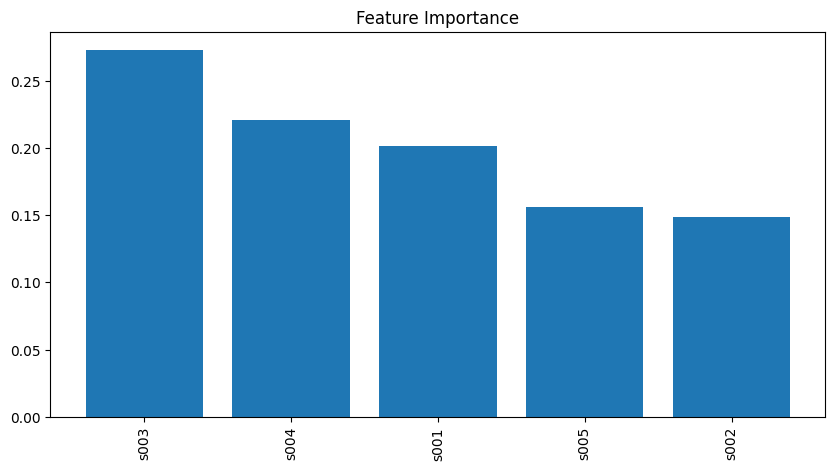

In [11]:
# Visualize the feature importances
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]
features = features.columns
plt.figure(figsize=(10,5))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), features[indices], rotation=90)
plt.show()


In [12]:
def predict_room(s001, s002, s003, s004, s005):
    
    # Load the trained Random Forest model from file
    with open('rf_model.pkl', 'rb') as file:
        rfc = pkl.load(file)

    # Create a DataFrame with the input features
    input_df = pd.DataFrame([[s001, s002, s003, s004, s005]], columns=['s001', 's002', 's003', 's004', 's005'])

    # Make the prediction using the trained Random Forest model
    prediction = rfc.predict(input_df)[0]

    # Return the predicted room
    return prediction

In [16]:

with open('rf_model.pkl', mode='wb') as f:
    pkl.dump(rfc, f)